### World Development Indicators
UCSD Python for Data Science week six project

**Project Goal**

* Determine what countries have had the highest percent change in indicators between 1960 and 2015.<br><br>
* Select only countries and indicators that have been reported in all years in the dataset (1960 through 2015)._
* Examine the top and bottom of the list and recommend next steps.

**Import Libraries**

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Case Study: World Development Indicators Dataset**<br><br>
**Our working dataset will be a subset of Indicator table**<br>
First, a quick look at the Indicators table.<br>
Source is World Bank, via Kaggle https://www.kaggle.com/worldbank/world-development-indicators

In [2]:
# connect to the sqllite database
cnx = sqlite3.connect('./data/database.sqlite')

In [3]:
# a look at the complete Indicators Table
sql_stmt = "select * from Indicators"
Indicators = pd.read_sql_query(sql_stmt, cnx)
print(Indicators.head())
print(Indicators.tail())

  CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   

    IndicatorCode  Year         Value  
0     SP.ADO.TFRT  1960  1.335609e+02  
1     SP.POP.DPND  1960  8.779760e+01  
2  SP.POP.DPND.OL  1960  6.634579e+00  
3  SP.POP.DPND.YG  1960  8.102333e+01  
4  MS.MIL.XPRT.KD  1960  3.000000e+06  
        CountryName CountryCode                              IndicatorName  \
5656453    Zimbabwe         ZWE  Time required to register property (days)   
5656454    Zimbabwe         ZWE   Time required to start a business (days)   
5656455    Zimbabwe         ZWE      Time to 

In [4]:
Indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [5]:
Indicators.describe()

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


### The range of years and number of years in the study.


In [6]:
print(min(Indicators.Year)," to ",max(Indicators.Year))

1960  to  2015


In [7]:
years = Indicators['Year'].unique().tolist()
len(years)

56

### The Indicators table was used to create the final dataframe for study using these two SQL statements<br>
<br>
**The first SQL statement creates a table with Countries and Indicators that have values for each of the 56 years from 1960 through 2015.**<br>

**The second SQL uses the first SQL to filter the final result to just those Countries/Indicators, adds columns that contain the  values for the first year and the last year, calculates the percent change between those two values and then sorts the dataset in decending order by percent change and selected the 10 country, indicators with the most change.**<br>
<br>
<br>
**-- create table of counties with Indicators over all years to use as a filter**
```
CREATE TABLE select_Country_Indicators(
	CountryName TEXT, 
	CountryCode TEXT, 
	IndicatorName TEXT, 
	IndicatorCode TEXT, 
	val_1960 NUMERIC, 
	val_2015 NUMERIC, 
	percentChange NUMERIC)

insert into country_ind_all_years as
select CountryName, CountryCode, IndicatorName, IndicatorCode, count(*)
from Indicators
where Year between 1960 and 2015
group by CountryCode, IndicatorCode
having count(*) = 56;
```

**Create the final table of countries / indicators including values required for study**
```
create table select_Country_Indicators as
select distinct a.CountryName, a.CountryCode, a.IndicatorName, a.IndicatorCode, 
	b.Value as val_1960, c.Value as val_2015
from country_ind_all_years a
join Indicators b on a.CountryCode = b.CountryCode and a.IndicatorCode = b.IndicatorCode and b.Year=1960
join Indicators c on a.CountryCode = c.CountryCode and a.IndicatorCode = c.IndicatorCode and c.Year=2015;
```

**Becuase of technical issues, the percent change was calculated in Excel and the data saved as a .csv file.**

_I know I should have done this with python, but after two days of struggle, I fell back on a language that I knew well so I could submit the project promptly. I'll go back and work through this in python later._

**On to the analysis as stated in the goal.**

**Create dataframe of selected countries and filter to the top 10**

In [8]:
sql_stmt = "select CountryCode, IndicatorCode, val_1960, val_2015 from select_Country_Indicators"
country_ind_ = pd.read_sql_query(sql_stmt, cnx)
ind4study.head(10)

NameError: name 'ind4study' is not defined

In [9]:
# read csv of above with percent change columns added in excel
ind4study = pd.read_csv('./data/select_Country_Indicators.csv')
ind4study.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,val_1960,val_2015,percentChange,abs_prct_chng
0,Portugal,PRT,Number of under-five deaths,SH.DTH.MORT,23643.0,304.0,-98.714207,98.714207
1,Portugal,PRT,Number of infant deaths,SH.DTH.IMRT,17652.0,251.0,-98.578065,98.578065
2,"Korea, Rep.",KOR,Number of under-five deaths,SH.DTH.MORT,80329.0,1559.0,-98.059231,98.059231
3,"Korea, Rep.",KOR,Number of infant deaths,SH.DTH.IMRT,52764.0,1329.0,-97.481237,97.481237
4,"Korea, Rep.",KOR,"Mortality rate, under-5 (per 1,000)",SH.DYN.MORT,112.9,3.4,-96.988485,96.988485


In [10]:
ind4study.describe()

,val_1960,val_2015,percentChange,abs_prct_chng
count,4.420000e+02,4.420000e+02,442.000000,442.000000
mean,3.056440e+05,1.000157e+05,-70.277483,74.301277
std,1.841616e+06,6.008266e+05,32.922928,22.379562
min,1.630000e+01,1.600000e+00,-98.714207,0.216744
25%,1.082750e+02,1.677591e+01,-89.366094,68.050292
50%,2.631000e+02,6.465000e+01,-82.316935,82.316935
75%,1.843350e+04,3.289750e+03,-67.807806,89.366094
max,1.835379e+07,5.944556e+06,72.187570,98.714207


**Explore Indicator Table**

In [11]:
ind4study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 8 columns):
CountryName      442 non-null object
CountryCode      442 non-null object
IndicatorName    442 non-null object
IndicatorCode    442 non-null object
val_1960         442 non-null float64
val_2015         442 non-null float64
percentChange    442 non-null float64
abs_prct_chng    442 non-null float64
dtypes: float64(4), object(4)
memory usage: 27.7+ KB


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [12]:
# check for nulls
ind4study.isnull().any().any(), ind4study.shape
ind4study.isnull().sum(axis=0)

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
val_1960         0
val_2015         0
percentChange    0
abs_prct_chng    0
dtype: int64

### How many years of data do we have ?

In [13]:
### What's the range of years?
print(min(years)," to ",max(years))

1960  to  2015


In [14]:
# Describe data
ind4study.describe()

,val_1960,val_2015,percentChange,abs_prct_chng
count,4.420000e+02,4.420000e+02,442.000000,442.000000
mean,3.056440e+05,1.000157e+05,-70.277483,74.301277
std,1.841616e+06,6.008266e+05,32.922928,22.379562
min,1.630000e+01,1.600000e+00,-98.714207,0.216744
25%,1.082750e+02,1.677591e+01,-89.366094,68.050292
50%,2.631000e+02,6.465000e+01,-82.316935,82.316935
75%,1.843350e+04,3.289750e+03,-67.807806,89.366094
max,1.835379e+07,5.944556e+06,72.187570,98.714207


In [15]:
# Didn't expect these to corrolate
ind4study.corr()

,val_1960,val_2015,percentChange,abs_prct_chng
val_1960,1.000000,0.989164,0.015160,-0.049467
val_2015,0.989164,1.000000,0.037983,-0.073855
percentChange,0.015160,0.037983,1.000000,-0.842187
abs_prct_chng,-0.049467,-0.073855,-0.842187,1.000000


<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

**No nulls found, data OK in that respect.**


In [16]:
# rows and columns count
ind4study.shape

(442, 8)

In [17]:
# Are any rows null?
ind4study.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
val_1960         False
val_2015         False
percentChange    False
abs_prct_chng    False
dtype: bool

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

Text(0.5, 1.0, 'Histogram of Percent Change of Indicator Values')

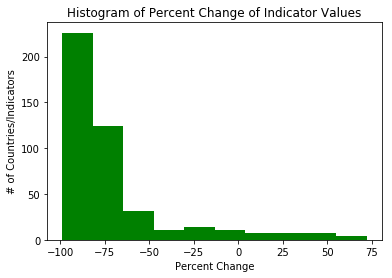

In [18]:
plt.hist(ind4study['percentChange'], 10, density=False, facecolor='green')
plt.xlabel('Percent Change')
plt.ylabel('# of Countries/Indicators')
plt.title('Histogram of Percent Change of Indicator Values')

In [19]:
# list 10 most changed
ind4study.head(10)[['CountryName','CountryCode','IndicatorName','val_1960','val_2015','percentChange']]

,CountryName,CountryCode,IndicatorName,val_1960,val_2015,percentChange
0,Portugal,PRT,Number of under-five deaths,23643.0,304.0,-98.714207
1,Portugal,PRT,Number of infant deaths,17652.0,251.0,-98.578065
2,"Korea, Rep.",KOR,Number of under-five deaths,80329.0,1559.0,-98.059231
3,"Korea, Rep.",KOR,Number of infant deaths,52764.0,1329.0,-97.481237
4,"Korea, Rep.",KOR,"Mortality rate, under-5 (per 1,000)",112.9,3.4,-96.988485
5,Bahrain,BHR,"Mortality rate, under-5 (per 1,000)",200.0,6.2,-96.900000
6,Portugal,PRT,"Mortality rate, under-5 (per 1,000)",114.6,3.6,-96.858639
7,United Arab Emirates,ARE,"Mortality rate, under-5 (per 1,000)",204.6,6.8,-96.676442
8,Italy,ITA,Number of infant deaths,40753.0,1378.0,-96.618654
9,Portugal,PRT,"Mortality rate, infant (per 1,000 live births)",84.6,3.0,-96.453901


In [20]:
# countries with lon/lat
import folium
import pandas as pd
county_coord = pd.read_csv('./data/country_lat_long.csv',encoding='utf-8')
county_coord.set_index('Country')
county_coord

,CountryCode,Country,Lat,Long
0,PRT,Portugal,39.399900,-8.224500
1,KOR,"Korea, Rep",39.021390,125.752750
2,BHR,Bahrain,26.066700,50.557701
3,ARE,United Arab Emirates,23.424076,53.847816
4,ITA,Italy,41.871941,12.567380


In [21]:
# show countries of interest on a map
m = folium.Map(
    location=[23.424076, 53.847816],
    tiles='Stamen Terrain',
    zoom_start=3
)

folium.Marker(
    [39.3999, -8.2245],
    popup='Portugal'
).add_to(m)

folium.Marker(
    [39.02139, 125.75275],
    popup='Korea, Rep'
).add_to(m)
folium.Marker(
    [26.0667, 50.557701],
    popup='Bahrain'
).add_to(m)

folium.Marker(
    [23.424076, 53.847816],
    popup='United Arab Emirates'
).add_to(m)

folium.Marker(
    [41.871941, 12.56738],
    popup='Italy'
).add_to(m)

m

In [22]:
# Sample 1 top and one near the bottom for discussion
sql_stmt = "select IndicatorName, CountryName, Value as infantDeaths from Indicators where CountryCode in ('PRT','TGO') and IndicatorCode in ('SP.POP.TOTL','SH.DTH.IMRT') and Year = 2015"
lives1 = pd.read_sql_query(sql_stmt, cnx)
lives1.head()

,IndicatorName,CountryName,infantDeaths
0,Number of infant deaths,Portugal,251
1,Number of infant deaths,Togo,13077


In [23]:
cCode = ['PRT', 'TGO']
ind4study_subset = ind4study[ind4study.CountryCode.isin(cCode)]
ind4study_subset = ind4study_subset[ind4study_subset.IndicatorCode == 'SH.DTH.IMRT']
ind4study_subset.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,val_1960,val_2015,percentChange,abs_prct_chng
1,Portugal,PRT,Number of infant deaths,SH.DTH.IMRT,17652.0,251.0,-98.578065,98.578065
426,Togo,TGO,Number of infant deaths,SH.DTH.IMRT,11431.0,13077.0,14.399440,14.399440


**Conclusions**

All of the most significant improvements in the indicators are;
* related to infant mortality rates

**Improvements of this magnitude are significant when you consider what these numbers mean.**
For example, if you just consider Portugal, the improvements represent that 23,339 fewer children died in 2015 than would have considering that over 23,643 where dying each year.

If you consider Togo that had a similar infant mortality rate as Portugal but has not shown improvements.  They still have about the same number of children under 5 die each year.


Recommendations for further study.
* Exam the details of counties that showed the most improvement and try to determine best practices.
* Exam the circumstances of countries like Toga and see what best practices could be implemented.
